# Data Understanding

**Berikut adalah beberapa tahapan untuk memahami data:**
- Data Loading
- Univariate Exploratory Data Analysis
- Data Preprocessing

## Data Loading

Pada bagian ini, dataset akan dibaca secara langsung dari folder dataset yang sudah di download melalui [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data). Seperti yang telah dijelaskan sebelumnya, terdapat 3 file dataset di dalam folder yaitu Books, Ratings, dan Users yang akan digunakan untuk proses pengembangan model.

### Import libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate

### Load the dataset

Baca dataset dengan menggunakan fungsi pandas.read_csv. Implementasikan kode berikut.

In [2]:
books = pd.read_csv("book-dataset/books.csv")
ratings = pd.read_csv("book-dataset/ratings.csv")
users = pd.read_csv("book-dataset/users.csv")

C:\Users\unoto\AppData\Local\Temp\ipykernel_9312\1353837609.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("book-dataset/books.csv")


In [3]:
# dataset books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Konversi dataframe ke dalam format markdown
# print(tabulate(books.head(), tablefmt="pipe", headers="keys"))

In [5]:
# dataset ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# dataset users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
print('Jumlah data buku:', len(books.ISBN.unique()))
print('Jumlah data rating buku dari pembaca:', len(ratings.ISBN.unique()))
print('jumlah data pengguna:', len(users['User-ID'].unique()))

Jumlah data buku: 271360
Jumlah data rating buku dari pembaca: 340556
jumlah data pengguna: 278858


Berdasarkan output diatas, diperoleh informasi sebagai berikut:
- Variabel books memiliki 271.360 jenis buku dan terdiri dari 8 kolom yaitu:
    - ISBN : merupakan nomor identitas unik buku.
    - Book-Title : merupakan judul buku.
    - Book-Author : merupakan nama penulis buku.
    - Year-Of-Publication : merupakan tahun publikasi buku.
    - Publisher : merupakan nama penerbit buku.
    - Image-URL-S : merupakan link URL gambar untuk ukuran small (kecil).
    - Image-URL-M : merupakan link URL gambar untuk ukuran medium (sedang).
    - Image-URL-L : merupakan link URL gambar untuk ukuran large (besar).
- Variabel ratings memiliki 340.556 penilaian terhadap buku dan terdiri dari 3 kolom yaitu:
    - User-ID : merupakan kode unik untuk nama pengguna anonim yang memberikan penilaian.
    - ISBN : merupakan nomor identitas buku.
    - Book-Rating : merupakan penilaian yang diberikan kepada buku.
- Variabel users memiliki 278.858 nama pengguna anonim dan terdiri dari 3 kolom yaitu:
    - User-ID : merupakan kode unik untuk nama pengguna anonim.
    - Location : merupakan lokasi tempat tinggal pengguna.
    - Age : merupakan usia pengguna.

## Univariate Exploratory Data Analysis

Pada tahap ini, akan dilakukan analisis dan eksplorasi pada setiap variabel untuk memahami distribusi dan karakteristik individu dari variabel tersebut. Pemahaman ini nantinya akan membantu dalam menentukan pendekatan atau algoritma yang cocok diterapkan pada data. Variabel - variabel pada Book Recommendation Dataset adalah sebagai berikut:
- books : merupakan data yang berisi informasi buku.
- ratings : merupakan rating atau peringkat yang diberikan ke buku oleh pengguna atau pembaca
- users : merupakan informasi pengguna termasuk informasi demografisnya.

### Books Variabel

Pertama, periksa terlebih dahulu isi dari dataset dari variabel books dan cek informasi dari dataset books menggunakan fungsi info().

In [8]:
# cek informasi dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output, diketahui bahwa file books.csv memiliki 271.360 entri dan terdiri dari 8 kolom yaitu ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, dan Image-URL-L. Diketahui juga bahwa kolom 'Year-Of-Publication' bertipe data object sedangkan tahun publikasi pada umumnya memiliki tipe data integer. Oleh karena itu akan dilakukan perbaikan tipe data terlebih dahulu.

Perhatikan, ketika menjalankan kode berikut:
```
books['Year-Of-Publication'].astype('int')
```

Terdapat error berupa `ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'`, artinya terdapat value pada 'Year-Of-Publication' ada yang bernilai 'DK Publishing Inc'. Sepertinya ini terdapat kesalahan input, sehingga nanti akan dihapus nilai berupa teks tersebut sebelum mengubahnya ke dalam tipe data integer. Berdasarkan penelusuran, terdapat 2 nilai teks yaitu 'DK Publishing Inc' dan 'Gallimard'.

In [9]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Menghapus value pada 'Year-Of-Publication' yang bernilai teks tersebut.

In [10]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Mengubah tipe data pada 'Year-Of-Publication'.

In [11]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


Sekarang, tipe data pada 'Year-Of-Publication' sudah bertipe integer. Selanjutnya, adalah menghapus variabel yang tidak diperlukan pada proses pengembangan model. Karena nantinya pada sistem rekomendasi berbasis konten (content-based filtering) akan dibuat rekomendasi berdasarkan judul buku yang sama dengan nama penulis buku yang pernah dibaca oleh pengguna. Maka informasi seperti ukuran gambar tidak diperlukan, sehingga fitur/kolom 'Image-URL-S', 'Image-URL-M', dan 'Image-URL-L' bisa dihapus.

In [12]:
# Menghapus kolom Image-URL semua ukuran
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Setelah di hapus kolom Image-URL sekarang dataset hanya tersisa 5 kolom/variabel saja. Untuk melihat berapa banyak entri dari masing - masing variabel jalankan kode berikut.

In [13]:
print("Jumlah nomor ISBN Buku:", len(books['ISBN'].unique()))
print("Jumlah judul buku:", len(books['Book-Title'].unique()))
print('Jumlah penulis buku:', len(books['Book-Author'].unique()))
print('Jumlah Tahun Publikasi:', len(books['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books['Publisher'].unique()))

Jumlah nomor ISBN Buku: 271357
Jumlah judul buku: 242132
Jumlah penulis buku: 102022
Jumlah Tahun Publikasi: 116
Jumlah nama penerbit: 16805


Berdasarkan output diatas diketahui jumlah dari masing - masing variabel. Perhatikan bahwa jumlah judul buku pada dataset yaitu 242.135 sedangkan jumlah nomor ISBN buku adalah 271.357, artinya ada beberapa buku yang tidak memiliki nomor ISBN, karena satu ISBN hanya boleh dimiliki oleh satu buku saja. Untuk Kasus ini nantinya dataset akan di filter agar setiap buku dipastikan memiliki satu nomor ISBN.

Selanjutnya, Dilakukan distribusi data untuk melihat 10 nama penulis teratas berdasarkan jumlah buku.

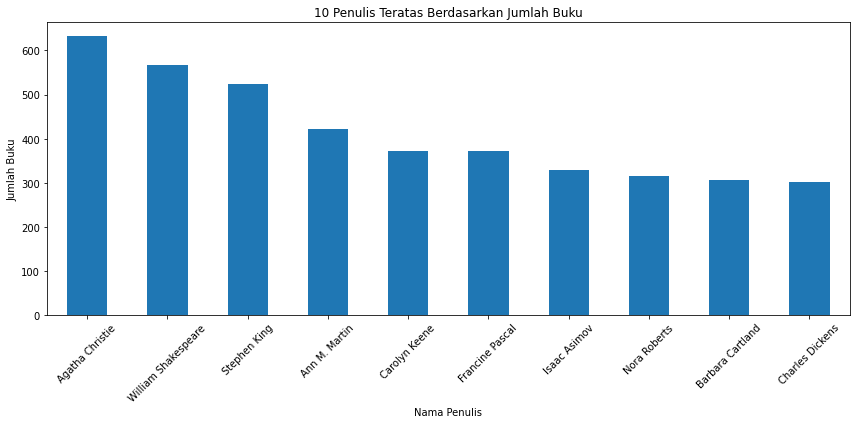

In [14]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan informasi diatas, diketahui bahwa penulis dengan nama Agatha Christie menulis paling banyak buku yaitu sebanyak lebih dari 600 buku. Dari informasi ini juga diketahui jika di dalam dataset terdapat beberapa nama penulis yang menulis buku lebih dari satu judul buku.

### Ratings Variabel

Selanjutnya, dilakukan eksplorasi pada variabel ratings, yaitu penilaian terhadap buku dari pembaca atau pengguna. Dataset rating ini nantinya akan digunakan untuk proses pengembangan model dengan collaborative filtering. Gunakan fungsi info() untuk melihat informasi dari variabel tersebut.

In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output diatas, diketahui terdapat sebanyak 1.149.780 entri dan 3 kolom yaitu User-ID yang merupakan kode unik pengguna anonim yang memberikan peringkat, ISBN yang merupakan identitas berupa nomor unik buku, dan Book-Rating yang merupakan rating buku yang diberikan oleh pembaca atau pengguna. Untuk melihat jumlah entri dari masing - masing variabel, jalankan kode berikut.

In [17]:
print('Jumlah User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah buku berdasarkan ISBN:', len(ratings['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku berdasarkan ISBN: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


Berdasarkan output diatas, diketahui jika terdapat 105.283 pengguna yang memberikan rating buku, jumlah buku berdasarkan ISBN yang diberikan rating adalah 340.556 buku, dan rating yang diberikan oleh masing - masing buku memiliki niliai berkisar antara 0 sampai 10, dimana 0 adalah rating paling rendah sedangkan 10 adalah rating paling tertinggi.

Seperti terlihat pada informasi sebelumnya, dataset ratings memiliki 1.149.780 baris data, dan itu merupakan jumlah yang sangat banyak. Nantinya, dataset rating ini yang akan digunakan dalam proses pengembangan model dengan collaborative filtering. Oleh karena itu, untuk menghemat alokasi memori pada saat pelatihan model nantinya, dataset rating ini tidak akan digunakan semua. Dataset rating hanya mengambil data pertama hingga data ke 5000 saja (exclude data ke 5000). Dataset ini akan digunakan untuk pengembangan model dengan collaborative filtering karena membutuhkan data rating terhadap pengguna untuk memberikan rekomendasi judul buku kepada pengguna lainnya. Untuk memudahkan supaya tidak tertukar dengan fitur lain yang serupa, variabel diubah namanya menjadi df_rating.

In [18]:
df_rating = ratings[:5000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
4995,278418,0345309154,0
4996,278418,034530988X,0
4997,278418,0345313860,0
4998,278418,0345314255,0


### Users Variabel

Variabel terakhir yang akan dilakukan eksplorasi adalah variabel users. Variabel ini berisi informasi tentang pengguna anonim beserta demografinya. Gunakan fungsi info() untuk melihat informasi variabel.

In [19]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berdasarkan informasi diatas, diketahui terdapat 278.858 entri dan terdapat 3 variabel yaitu User-ID yang merupakan kode unik dari pengguna anonim, Location yang merupakan lokasi pengguna, dan Age yang merupakan usia pengguna. Diketahui juga terdapat beberapa pengguna yang usianya tidak diketahui. Data user berguna jika ingin membuat sistem rekomendasi berdasarkan demografi atau kondisi sosial pengguna. Namun, untuk studi kasus kali ini, tidak akan digunakan data users pada model. Pada pengembangan model, data yang digunakan adalah data books dan ratings.

## Data Preprocessing

Seperti yang sudah diketahui berdasarkan tahapan data understanding bahwa folder Book Recommendation Dataset terdiri dari 3 file terpisah yaitu books, ratings, dan users. Pada tahap ini, akan dilakukan proses penggabungan file menjadi satu kesatuan file agar sesuai dengan pengembangan model yang ingin dibuat.

### Menggabungkan file dan Mengetahui Jumlah Rating

Pada tahap ini dilakukan penggabungan file books dan ratings untuk mengetahui jumlah seluruh rating dari berbagai file tersebut. Implementasikan kode berikut.

In [21]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai ISBN
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


Variabel setelah dilakukan penggabungan menjadi 7 variabel dengan 1.149.780 baris data. Output diatas hanya menampilkan beberapa baris awal dan baris akhir data. Dataset inilah yang akan digunakan untuk membuat sistem rekomendasi. Selanjutnya, dilakukan perhitungan jumlah rating berdasarkan ISBN melalui kode berikut.

In [22]:
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Year-Of-Publication
ISBN,,,
0330299891,271009,6,0.0
0375404120,356057,3,0.0
0586045007,89192,0,0.0
9022906116,100868,7,0.0
9032803328,89192,0,0.0
...,...,...,...
cn113107,107301,0,0.0
ooo7156103,266146,7,0.0
§423350229,85250,0,0.0


# Data Preparation

## Data Preparation Untuk Model Pengembangan dengan Content Based Filtering

Pada tahap ini di akan dilakukan beberapa teknik untuk mempersiapkan data seperti:
- Menghilangkan missing value.
- Menyamakan jenis buku berdasarkan ISBN.

Pada sistem rekomendasi berbasis konten (content-based filtering) yang akan dikembangkan, satu nomor ISBN mewakili satu judul buku, yang artinya nomor ISBN pada setiap buku bersifat unik. Sehingga perlu dipersiapkan terlebih dahulu datanya agar siap untuk digunakan pada proses pelatihan model.

### Mengatasi Missing Value

Setelah proses penggabungan file, langkah selanjutnya adalah dilakukan proses pengecekan apakah ada missing value atau tidak. Jalankan kode berikut. 

In [23]:
# Cek missing value dengan fungsi isnull()
books.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118648
Book-Author            118649
Year-Of-Publication    118648
Publisher              118650
dtype: int64

Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur User-ID, ISBN, dan Book-Rating saja yang memiliki 0 missing value. Jumlah mising value terbesar ada di fitur 'Publisher' yaitu sebesar 118.650. 118.650 dari total dataset yaitu 1.149.780 merupakan jumlah yang tidak terlalu signifikan atau masih tergolong kecil. Oleh karena itu, untuk kasus ini akan dilakukan proses drop atau penghapusan pada missing value ini dan buatkan dalam bentuk variabel baru bernama all_books_clean.

In [24]:
all_books_clean = books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


Sekarang, dataset terdiri dari 1.031.129 baris. Untuk memastikan tidak ada missing value lagi dalam data, jalankan kode berikut.

In [25]:
all_books_clean.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Sekarang, dataset sudah bersih dan bisa lanjut ke tahap berikutnya.

### Menyamakan jenis buku berdasarkan ISBN

Sebelum masuk tahap pemodelan, diperlukan proses menyamakan judul buku berdasarkan ISBN-nya. Jika terdapat nomor ISBN yang sama pada lebih dari satu judul buku dapat menyebabkan bias pada data. Oleh karena itu harus dipastikan bahwa hanya terdapat satu nomor ISBN pada satu judul buku saja.

Pertama, dilakukan proses pengecekan ulang data setelah proses cleaning pada tahap sebelumnya. Buat variabel baru bernama fix_books untuk menyimpan dataframe.

In [26]:
# Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_books
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


Terdapat 1.031.129 baris data. Untuk mengecek berapa jumlah nomor ISBN yang mencangkup data tersebut, jalankan kode berikut.

In [27]:
# Mengecek berapa jumlah fix_books
len(fix_books['ISBN'].unique())

270145

Selanjutnya, cek jumlah judul buku dengan kode berikut.

In [28]:
len(fix_books['Book-Title'].unique())

241066

Berdasarkan informasi diatas, diketahui bahwa jumlah nomor ISBN dengan jumlah judul buku tidak sama, artinya terdapat nomor ISBN yang sama pada lebih dari satu judul buku. Hal tersebut harus diatasi dengan mengubah datasetnya menjadi data unik sehingga nantinya siap dimasukkan ke dalam proses pemodelan. Oleh karena itu, diperlukan proses membuang data duplikat pada kolom 'ISBN' dan simpan ke dalam variabel baru bernama 'preparation. implementasikan kode berikut.

In [29]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


Setelah itu, kita lakukan proses pengecekan kembali jumlah data dari ISBN, judul buku (Book-Title), dan nama penulis buku (Book-Author). Dilakukan proses konversi data series menjadi list dengan fungsi [tolist()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html) dari library. Implementasikan kode berikut.

In [30]:
# konversi data series 'ISBN' menjadi bentuk list
isbn_id = preparation['ISBN'].tolist()

# konversi data series 'Book-Title' menjadi bentuk list
book_title = preparation['Book-Title'].tolist()

# konversi data series 'Book-Author' menjadi bentuk list
book_author = preparation['Book-Author'].tolist()

# konversi data series 'Year-Of-Publication' menjadi bentuk list
year_of_publication = preparation['Year-Of-Publication'].tolist()

# konversi data series 'Publisher' menjadi bentuk list
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270145
270145
270145
270145
270145


Berdasarkan output diatas, diketahui bahwa sekarang jumlah data dari ISBN, judul buku, nama penulis buku, tahun publikasi dan nama penerbit sudah sama atau sudah merupakan data unik dan dataset hanya tersisa 270.145 baris data setelah melewati proses penghilangan duplikasi nilai. Tahap berikutnya yaitu pembuatan dictionary untuk menentukan pasangan key-value pada data isbn_id, book_title, book_author, year_of_publication, dan publihser yang sudah disiapkan sebelumnya untuk proses pengembangan model sistem rekomendasi berbasis konten (content-based filtering).

In [31]:
# Membuat dictionary untuk data ‘isbn_id’, ‘book_title’, ‘book_author’, 'year_of_publication', dan 'publisher'
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270140,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270141,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270142,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270143,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


Karena dataset yang dimiliki terlalu banyak dan secara otomatis alokasi memori yang digunakan nantinya akan sangat banyak untuk memproses seluruh data pada pengembangan model, maka pada proyek ini hanya akan mengambil data pertama hingga data ke 20.000 (exlude data ke 20.000).

In [32]:
books_new = books_new[:20000]

In [33]:
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
19995,0140444696,The Kreutzer Sonata and Other Stories (Penguin...,Leo Tolstoy,1986.0,Penguin Books
19996,014044470X,The Fiancee and Other Stories (Penguin Classics),Anton Pavlovich Chekhov,1986.0,Penguin Books
19997,0140444726,Jacques the Fatalist and His Master (Penguin C...,Denis Diderot,1986.0,Penguin Books
19998,0140444742,Seven Viking Romances (Penguin Classics),Hermann Palsson,1986.0,Penguin Books


Inilah data yang akan digunakan pada proses pengembangan model dengan teknik content based filtering.

## Data Preparation Untuk Model Pengembangan dengan Collaborative Filtering

Pada model pengembangan dengan collaborative filtering, data nantinya akan dibagi menjadi data training dan data validasi dalam proses pelatihan model, sebelum di bagi menjadi data training dan data validasi, data harus dipersiapkan terlebih dahulu. Data rating harus diubah ke dalam bentuk matriks numerik agar nantinya mempermudah proses pelatihan model sehingga model menjadi mudah mengenali/mempelajari data tersebut. Sebelum itu dilakukan, Pada tahap ini di dilakukan beberapa teknik untuk mempersiapkan data seperti menyandikan (encode) fitur 'User-ID' dan 'ISBN' ke dalam indeks integer, memetakan 'User-ID' dan 'ISBN'ke dataframe yang berkaitan, dan yang terakhir mengecek beberapa hal dalam data seperti jumlah pengguna, jumlah buku, kemudian mengubah nilai rating menjadi float agar bisa digunakan pada proses pelatihan model.

Pertama, dilakukan proses menyandikan (encode) fitur 'User-ID' dan 'ISBN' ke dalam indeks integer. Terapkan kode berikut.

In [34]:
# mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df_rating['User-ID'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

Selanjutnya, lakukan hal yang sama pada 'ISBN'.

In [35]:
# mengubah ISBN menjadi list tanpa nilai yang sama
isbn_id = df_rating['ISBN'].unique().tolist()

# melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

Berikutnya, petakan User-ID dan ISBN ke dataframe yang berkaitan.

In [36]:
# Menonaktifkan peringatan SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # "warn" atau "raise" untuk menyalakannya kembali

# Mapping User-ID ke dataframe user
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe judul buku
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah judul buku, dan mengubah nilai rating menjadi float.

In [37]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# mendapatkan jumlah judul buku
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# mengubah rating menjadi nilai float
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df_rating['Book-Rating'])

# nilai maksimum rating
max_rating = max(df_rating['Book-Rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book_title, min_rating, max_rating
))

679
4688
Number of User: 679, Number of Resto: 4688, Min Rating: 0.0, Max Rating: 10.0


Tahap persiapan data sudah selesai. Data sudah siap untuk digunakan nantinya pada proses pembagian menjadi data training dan data validasi pada proses pengembangan model dengan collaborative filtering.

# Modeling

## Model Development dengan Content Based Filtering

Pada tahap ini, akan dikembangkan model dengan teknik Content Based Filtering. Content Based Filtering adalah salah satu pendekatan dalam sistem rekomendasi yang menggunakan informasi atau "konten" dari item atau pengguna untuk membuat rekomendasi. Ide dasarnya adalah mencocokkan preferensi pengguna dengan karakteristik atau konten dari item yang telah dilihat atau disukai oleh pengguna sebelumnya. Misalkan, jika seorang pengguna menyukai atau pernah membeli buku dengan judul "Introduction to Machine Learning" dan buku tersebut memiliki fitur berupa nama penulis buku yaitu "Alex Smola", maka sistem akan mencari buku lain dengan fitur serupa dan merekomendasikannya dalam bentuk top-N recommendation kepada pengguna tersebut.

Pada proses pengembangan model dilakukan pencarian representasi fitur penting dari setiap judul buku dengan TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer. TF-IDF vectorizer adalah alat yang digunakan untuk mengonversi dokumen teks menjadi representasi vektor berdasarkan nilai TF-ID setiap kata dalam dokumen tersebut. TF (Term Frequency) mengukur seberapa sering suatu kata muncul dalam suatu dokumen. Sedangkan, IDF mengukur seberapa unik atau jarang suatu kata muncul dalam seluruh koleksi dokumen. Vektor ini nanti digunakan untuk melakukan proses pencarian representasi fitur penting dari setiap judul buku berdasarkan nama penulis buku pada model yang dikembangkan dengan teknik Content Based Filtering. Pada proyek ini digunakan fungsi [tfidfvectorizer()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) dari library Sklearn.

Sementara itu, untuk menghitung derajat kesamaan (similarity degree) antar judul buku digunakan teknik cosine similarity. Metode ini digunakan untuk mengukur sejauh mana kesamaan antar dua vektor dalam ruang berdimensi banyak. Cosine similarity mengukur sudut kosinus antara dua vektor, dan semakin kecil sudutnya, semakin besar kesamaan antara vektor - vektor tersebut. Pada proyek ini digunakan fungsi [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) dari library Sklearn.

Sebelum memulai proses pengembangan model dengan Content based Filtering, dilakukan pengecekan kembali dataset dan assign dataframe dari tahap sebelumnya ke dalam variabel "data".

In [38]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
16393,0140124373,Red Dwarf,Grant Naylor,2005.0,Penguin Books Ltd
6285,0060603402,The Mezuzah in the Madonna's Foot: Marranos an...,Trudi Alexy,1994.0,HarperSanFrancisco
18705,0140327770,Games.... (Puffin Books),Robin Klein,1988.0,Puffin Books
5069,0060254637,In Grandpa's House,Philip Sendak,1985.0,HarperCollins Publishers
15529,0140065008,The Deptford Trilogy (King Penguin S.),Robertson Davies,1983.0,Penguin Books Ltd


### TF-IDF Vectorizer

Import fungsi tfidfvectorizer() dari libray Sklearn.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['1988', 'aaron', 'aarons', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [40]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author']) 

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(20000, 8746)

Berdasarkan output, matrik memiliki ukuran (20000, 8746). Nilai 20000 merupakan ukuran data dan 8746 merupakan matriks nama penulis buku. Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense().

In [41]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari lihat matriks tf-idf untuk beberapa judul buku dan nama penulis buku dalam bentuk dataframe, dimana kolom diisi dengan nama penulis buku sedangkan baris diisi dengan judul buku.

In [42]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,phyllis,kinnaman,eldon,sanes,aguilera,lippman,nersesian,carrie,brin,hesse,randy,deci,smolan,bigham,dugan
book_title,,,,,,,,,,,,,,,
The Movies of My Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Bronze Horseman: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Princess Diaries, Volume IV: Princess in Waiting (Princess Diaries)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Predictive astrology: Understanding transits as the key to the future,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nice Girls Finish Last (Viking Mystery Suspense),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Send Wendell,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Secrets of Closing Sales (Business Classics (Hardcover Prentice Hall)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laughable Loves,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DICTIONARY OF ANGELS: INCLUDING THE FALLEN ANGELS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output dari matriks tf-idf berhasil mengidentifikasi representasi fitur penting dari setiap kategori judul buku dengan fungsi tfidfvectorizer. Pada Kasus ini dataset hanya ditampilkan berupa sampel data sehingga tidak terlihat keseluruhan matriks. Dari 20000 data hanya dipilih sampel data acak yang terdiri dari 10 judul buku pada baris vertikal dan 15 nama penulis buku pada baris horizontal.

### Cosine Similarity

Pada tahap sebelumnya, sudah berhasil mengidentifikasi korelasi antara judul buku dengan penulis buku. Sekarang, akan dilakukan proses menghitung derajat kesamaan (similarity degree) antar judul buku dengan teknik cosine similarity.

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahap ini, dilakukan proses perhitungan cosine similarity dataframe tfidf_matrix yang diperoleh pada tahapan sebelumnya. Dengan fungsi cosine_similarity dari library sklearn, didapat nilai kesamaan (similarity) antar judul buku. Kode diatas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, mari lihat matriks kesamaan setiap judul buku dengan menampilkan nama judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis = 0).

In [44]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,American Taboo : A Murder in the Peace Corps,"The Trouble With a Bad Fit: A Novel of Food, Fashion, and Mystery (Simona Griffo Mysteries (Hardcover))",Barnaby Rudge (Penguin English Library),Where's Dan Quayle?,Twas the Night Before: A Love Story
book_title,,,,,
How to Cook Everything: Simple Recipes for Great Food,0.0,0.0,0.0,0.0,0.0
"What the Moon is Like (Let's-Read-and-Find-Out Science, Stage 2)",0.0,0.0,0.0,0.0,0.0
The Book of Changes: Stories,0.0,0.0,0.0,0.0,0.0
O'Leary Series: Microsoft Windows 98,0.0,0.0,0.0,0.0,0.0
Flight Lessons,0.0,0.0,0.0,0.0,0.0
Burning Houses,0.0,0.0,0.0,0.0,0.0
To Race a Dream,0.0,0.0,0.0,0.0,0.0
"King, Warrior, Magician, Lover : Rediscovering the Archetypes of the Mature Masculine",0.0,0.0,0.0,0.0,0.0
In Search of Excellence: Lessons from America's Best-Run Companies,0.0,0.0,0.0,0.0,0.0


Dengan cosine similarity, berhasil mengidentifikasi kesamaan antara satu judul buku dengan judul buku lainnya. Shape (20000, 20000) merupakan ukuran matriks similarity dari data. Berdasarkan data yang ada, matriks diatas sebenarnya berukuran 20000 judul buku x 20000 judul buku (masing - masing dalam sumbu X dan Y). Artinya, telah berhasil mengidentifikasi tingkat kesamaan pada 20000 judul buku. Tapi disini tidak bisa menampilkan semua datanya. Oleh karena itu, hanya dipilih 10 judul buku pada baris vertikal dan 5 judul buku pada baris horizontal. Dengan data kesamaan (similarity) judul buku yang diperoleh sebelumnya, akan dilakukan proses rekomendasi daftar judul buku yang mirip dengan judul buku yang sebelumnya pernah dibeli atau dibaca oleh pengguna.

### Mendapatkan Rekomendasi

Pada tahap ini, akan dibuatkan sebuah fungsi bernama book_recommendations dengan beberapa parameter sebagai berikut:
- book_title : nama judul buku (index kemiripan dataframe).
- similarity_data : Dataframe mengenai similarity yang telah didefinisikan sebelumnya.
- items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah 'book_title' dan 'book_author'.
- k : Jumlah top-N recommendation yang diberikan oleh sistem rekomendasi. Secara default, k bernilai 5.

Sebelum menulis kode, perlu diingat bahwa definisi dari sistem rekomendasi yang menyatakan bahwa keluaran sistem adalah berupa top-N recommendation. Oleh karena itu, perlu diberikan sejumlah rekomendasi judul buku pada pengguna yang diatur pada parameter k.

In [45]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perhatikan, dengan menggunakan argpartition dilakukan proses pengambilan sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Selanjutnya, mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, perlu dihapus book_title yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, akan dicari judul buku yang mirip dengan judul buku yang nanti di input dalam book_title, sehingga perlu drop book_title agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.

Gunakan fungsi book_recommendation tersebut untuk membuat rekomendasi 5 buku teratas yang direkomendasikan oleh sistem.

In [46]:
book_title_test = "Entering the Silence : Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)" # contoh judul buku

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
6448,0060654775,Entering the Silence : Becoming a Monk and a W...,Thomas Merton,1997.0,HarperSanFrancisco


Perhatikan, bahwa judul buku 'Entering the Silence : Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)' ditulis oleh 'Thomas Merton'. Sekarang, gunakan fungsi book_recommendation untuk mendapatkan rekomendasi berdasarkan judul buku tersebut.

In [47]:
# Mendapatkan rekomendasi judul buku yang mirip
book_recommendation(book_title_test)

,book_title,book_author
0,Dancing in the Water of Life: Seeking Peace in...,Thomas Merton
1,Dialogues with Silence: Prayers and Drawings,Thomas Merton
2,The Other Side of the Mountain: The End of the...,Thomas Merton
3,Run to the Mountain : The Story of a VocationT...,Thomas Merton
4,Turning Toward the World: The Pivotal Years (T...,Thomas Merton


Berdasarkan output diatas, sistem berhasil merekomendasikan 5 judul buku teratas dengan kategori nama penulis (book_author) yaitu 'Thomas Merton'.

## Model Development dengan Collaborative Filtering

Pada proses pengembangan model kali ini, akan diterapkan teknik collaborative filtering untuk membuat sistem rekomendasi. Teknik ini membutuhkan data rating dari pengguna atau pembaca. Collaborative filtering adalah salah satu metode dalam sistem rekomendasi yang memprediksi preferensi atau minat pengguna terhadap item berdasarkan informasi dari pengguna lain (kolaborasi). Ide dasar dibalik collaborative filtering adalah bahwa pengguna yang memiliki preferensi serupa dalam masa lalu cenderung memiliki preferensi serupa untuk item di masa depan. Pada proyek ini akan dibuat model collaborative filtering berdasarkan kesamaan antar pengguna (User-Based Collaborative Filtering).

Pengembangan model dengan Collaborative filtering pada proyek ini akan menghasilkan rekomendasi sejumlah judul buku yang sesuai dengan preferensi pengguna berdasarkan rating yang telah diberikan sebelumnya. Dari data rating pengguna, akan diidentifikasi nama - nama judul buku yang mirip dan belum pernah dibaca atau dibeli oleh pengguna untuk direkomendasikan. 

Setelah tahapan persiapan data untuk pengembangan model ini sudah dilakukan di bagian data preparation sebelumnya, langkah selanjutnya dilakukan pembagian data untuk data training dan data validasi, kemudian dilanjutkan dengan proses training model. Pada proses training, model menghitung skor kecocokan antara pengguna dan judul buku dengan teknik embedding. Pertama, dilakukan proses embedding terhadap data pengguna dan judul buku. Selanjutnya, lakukan operasi perkalian dot product antara embedding pengguna dan judul buku. Selain itu, ditambahkan bias untuk setiap pengguna dan judul buku. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Model dibuatkan class RecommenderNet dengan [keras Model class](https://keras.io/api/models/model/). Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs [keras](https://keras.io/examples/structured_data/collaborative_filtering_movielens/) dengan beberapa adaptasi layer yang menyesuaikan dengan kasus yang sedang dikerjakan. Model akan menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan Root Mean Squared Error (RMSE) sebagai metrik evaluasi.

### Membagi data untuk Training dan Validasi

Sebelum dilakukan pembagian data menjadi training dan validasi, data terlebih dahulu diacak agar distribusinya menjadi random.

In [54]:
# mengacak dataset
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Selanjutnya, dilakukan proses pembagian data menjadi data train dan validasi dengan komposisi 90:10. Namun sebelumnya, perlu dipetakan (mapping) data user dan judul buku menjadi satu value terlebih dahulu. Kemudian, dibuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [55]:
# membuat variabel x untuk mencocokkan data user dan judul buku menjadi satu value
x = df_rating[['user', 'book_title']].values

# membuat variabel y untuk membuat rating dari hasil
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 80% data train dan 10% data validasi

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


Sampai proses ini, data sudah siap untuk dimasukkan ke dalam pengembangan model dengan collaborative filtering.

### Proses training

Pada proses training model, model akan menghitung skor kecocokan antara pengguna dan judul buku dengan teknik embedding. Pertama, dilakukan proses embedding terhadap data user dan book_title. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan book_title. Selain itu, juga dapat menambahkan bias untuk setiap user dan book_title. Skor kecocokan ditetapkan dalam skala [0, 1] dengan fungsi aktivasi sigmoid.

Di sini, Model dibuatkan class RecommenderNet dengan [keras Model class](https://keras.io/api/models/model/). Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs [keras](https://keras.io/examples/structured_data/collaborative_filtering_movielens/) dengan beberapa adaptasi layer yang menyesuaikan dengan kasus yang sedang dikerjakan.

In [59]:
class RecommenderNet(tf.keras.Model):

    # inisialisasi fungsi
    def __init__(self, num_users, num_book_title, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book_title = num_book_title
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_title_embedding = layers.Embedding( # layer embedding book_title
            num_book_title,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title bias
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        book_title_vector = self.book_title_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_title_bias = self.book_title_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # perkalian dot product

        x = dot_user_book_title + user_bias + book_title_bias

        return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [60]:
model = RecommenderNet(num_users, num_book_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [61]:
# memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
282/282 [==============================] - 5s 10ms/step - loss: 0.6791 - root_mean_squared_error: 0.4292 - val_loss: 0.6644 - val_root_mean_squared_error: 0.4199
Epoch 2/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5847 - root_mean_squared_error: 0.3734 - val_loss: 0.6458 - val_root_mean_squared_error: 0.4088
Epoch 3/50
282/282 [==============================] - 3s 10ms/step - loss: 0.5623 - root_mean_squared_error: 0.3623 - val_loss: 0.6341 - val_root_mean_squared_error: 0.4019
Epoch 4/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5469 - root_mean_squared_error: 0.3526 - val_loss: 0.6208 - val_root_mean_squared_error: 0.3940
Epoch 5/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5358 - root_mean_squared_error: 0.3469 - val_loss: 0.6095 - val_root_mean_squared_error: 0.3873
Epoch 6/50
282/282 [==============================] - 3s 9ms/step - loss: 0.5178 - root_mean_squared_error: 0.3358 - val_loss: 0.5995 - va

Berdasarkan hasil proses training model, didapat hasil yang cukup memuaskan dan model konvergen pada epochs sekitar 50. Dari proses ini, diperoleh nilai Root Mean Squared Error (RMSE) sebesar sekitar 0.2007 dan RMSE pada data validasi sebesar 0.3424. Nilai ini cukup bagus untuk sistem rekomendasi. Untuk mengetahui hasil dari pengembangan model, langkah selanjutnya adalah mendapatkan rekomendasi judul buku berdasarkan model yang dikembangan.

### Mendapatkan Rekomendasi Judul Buku

Untuk mendapatkan rekomendasi judul buku, pertama diambil sampel user secara acak dan definisikan variabel `book_not_readed` yang merupakan daftar buku yang belum pernah dibaca atau dibeli oleh pengguna. variabel `book_not_readed` inilah yang akan menjadi judul buku yang direkomendasikan oleh sistem.

Variabel `book_bot_visited` diperoleh dengan menggunakan operator bitwise (~) pada variabel `book_readed_by_user`.

In [68]:
book_df = books_new

# mengambil sampel user
user_id = df_rating['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_rating[df_rating['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

Selanjutnya, untuk memperoleh rekomendasi judul buku, gunakan fungsi model.predict() dari library Keras.

In [69]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Membuat DataFrame untuk output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books


13/14 [==========================>...] - ETA: 0s

14/14 [==============================] - 0s 4ms/step
Showing recommendation for users: 276798
Book with high ratings from user
--------------------------------
                  Book Title      Book Author
0  My \Star Trek\" Memories"  William Shatner
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,Silence of the Sirens,Adel Garcia Morales
1,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,"On Writing Well, 25th Anniversary : The Classi...",William Zinsser
3,Get Shorty,Elmore Leonard
4,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich
5,Junky,William Burroughs
6,The Oranging of America and Other Stories,Max Apple
7,Joke,Milan Kundera
8,Tales of Mystery and Terror (Puffin Classics),Edgar Allan Poe
9,War and Peace (Penguin Classics),Leo Tolstoy


Berdasarkan output diatas, telah berhasil dibuat rekomendasi kepada user. Hasil di atas adalah rekomendasi untuk user dengan id 276798. Dari output tersebut, dapat dibandingkan antara 'Book with high ratings from user' dan 'Top 10 books recomendation' untuk user.

Perhatikan, beberapa judul buku rekomendasi menyediakan nama penulis bukunya juga yang sesuai dengan rating user. Diperoleh 10 top rekomendasi buku yang disertai juga dengan nama penulisnya untuk user tersebut serta terdapat 1 judul buku yang merupakan buku dengan rating tertinggi dari user.

# Evaluation

## Evaluasi Model dengan Content Based Filtering

Metrik yang digunakan untuk evaluasi model dengan content based filtering di proyek kali ini adalah Precision, Recall, dan F1-Score. Metrik ini adalah metrik yang umum digunakan untuk mengukur kinerja model. Precision merupakan rasio item yang revelan yang dihasilkan oleh model terhadap total item yang dihasilkan. Recall merupakan rasio item relevan yang dihasilkan oleh model terhadap total item yang seharusnya direkomendasikan. Sedangkan, F1 Score adalah gabungan dari Precision dan Recall, memberikan nilai tunggal yang mengukur keseimbangan antara keduanya.

Sebelum menghitung nilai evaluasi metrik menggunakan precision, recall dan f1 score, diperlukan sebuah data yang terdiri dari label sebenarnya dan digunakan untuk menilai hasil prediksi model, data ini disebut sebagai data **ground truth**. Data ground truth pada proyek ini dibuat menggunakan hasil derajat kesamaan yang dihitung menggunakan teknik cosine similarity, dimana setiap baris dan kolom mewakili judul buku, dan nilai di setiap sel pada dataframe mewakili label. Angka 1 untuk similar, dan angka 0 untuk tidak similar. Perlu ditetapkan juga sebuah nilai ambang batas atau threshold untuk memutuskan apakah nilai similarity antara dua item harus dianggap 1 (similar) atau 0 (tidak similar).

In [70]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)

Pada kode diatas, ditetapkan nilai ambang batas atau threshold sebesar 0.5. Nilai threshold ini disesuaikan dengan kebutuhan dan karakteristik setelah melihat hasil rekomendasi sebelumnya. Lalu dibuatkan matriks ground truth menggunakan fungsi np.where() dari NumPy. Matriks ini akan memiliki nilai 1 di posisi di mana nilai cosine similarity antara dua item lebih besar atau sama dengan nilai threshold yang ditetapkan, dan nilai 0 di posisi di mana nilai similarity di bawah threshold. Kemudian, setelah matriks dibuat, hasilnya disajikan dalam bentuk dataframe. Baris dan kolom Dataframe ground truth ini diindeks menggunakan judul buku dari data. Berikut tampilan dari dataframe ground truth.

In [71]:
ground_truth_df

book_title,Just Xml,Stonehenge Decoded,Fear of Falling: The Inner Life of the Middle Class,Evolutionary biology,Jaguar Woman and the Wisdom of the Butterfly Tree
book_title,,,,,
The Road to Oz (Puffin Classics),0,0,0,0,0
Roofworld,0,0,0,0,0
How to be a very important person (McGraw-Hill paperbacks),0,0,0,0,0
Hot Type: Our Most Celebrated Writers Introduce the Next Word in Contemporary American Fiction (Collier Fiction),0,0,0,0,0
The Jungle (The Penguin American Library),0,0,0,0,0
The Adoption Resource Book,0,0,0,0,0
Safe Place,0,0,0,0,0
The Thurber Carnival (Harper Colophon Books),0,0,0,0,0
Bingo Brown's Guide to Romance,0,0,0,0,0


Setelah dibuatkan matriks ground truth yang berisi label sebenarnya dari hasil cosine similarity. Selanjutnya, dilakukan proses perhitungan evaluasi model dengan metrik precision, recall, dan f1 score. Pertama, mengimport fungsi `precision_recall_fscore_support` dari [library Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) yang digunakan untuk menghitung precision, recall dan f1 score. Lalu karena keterbatasan alokasi memori pada perangkat, data hanya diambil sekitar 10000 sampel dari cosine similarity dan ground truth matriks. Hal ini dilakukan untuk mempercepat proses perhitungan, terutama karena ukuran matriks yang cukup besar. Kemudian, matriks cosine similarity dan ground truth dikonversi menjadi array satu dimensi agar mempermudah perbandingan dan perhitungan metrik evaluasi. 

Digunakan juga threshold untuk mengkategorikan nilai cosine similarity sebagai 1 atau 0. Jika nilai similarity di atas atau sama dengan threshold, dianggap sebagai 1 (positif), dan jika di bawah threshold, dianggap sebagai 0 (negatif). Hasilnya disimpan dalam array `predictions`. Terakhir, digunakan fungsi `precision_recall_fscore_support` untuk menghitung precision, recall, dan f1 score. Parameter average='binary' digunakan karena sedang mengukur kinerja dalam konteks klasifikasi biner (1 atau 0). Parameter 'zero_division=1' digunakan untuk menghindari pembagian dengan nol jika ada kelas yang tidak terdapat di prediksi. Implementasi kode berikut:

In [72]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Berdasarkan hasil evaluasi, didapat nilai dari masing - masing metrik evaluasi yaitu precision, recall dan F1 Score. Nilai Precision didapat sebesar 1.0, artinya semua prediksi positif model adalah benar dan tidak terdapat false positive. Nilai recall didapat nilai 1.0 menunjukkan bahwa model berhasil mengidentifikasi sekitar 100% dari semua item yang sebenarnya relevan. Nilai F1 Score didapat sekitar 1.0 juga, ini menunjukkan keseimbangan yang baik antara precision dan recall dan model cenderung memberikan hasil yang sangat baik untuk kedua kelas (positif dan negatif). Kesimpulannya, berdasarkan hasil metrik evaluasi tersebut model bekerja dengan sangat baik dalam memberikan rekomendasi item dengan content based filtering.

## Evaluasi Model dengan Collaborative Filtering

Seperti yang sudah dilihat pada proses pelatihan model di bagian modeling. Metrik yang digunakan untuk melakukan evaluasi model pada model dengan Collaborative Filtering di proyek ini adalah [Root Mean Squared Error (RMSE)](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/). RMSE adalah metrik evaluasi yang umum digunakan untuk mengukur seberapa baik model memprediksi nilai kontinu dengan membandingkan nilai prediksi dengan nilai sebenarnya. Dalam konteks collaborative filtering, RMSE biasanya digunakan untuk mengukur seberapa baik model kolaboratif dalam memprediksi preferensi pengguna terhadap item.

Berdasarkan hasil proses training model pada tahap modeling, diperoleh hasil pelatihan berupa informasi RMSE di data train dan validasi. Untuk melihat visualisai proses training model, dilakukan proses plot metrik evaluasi dengan matplotlib. Terapkan kode berikut. 

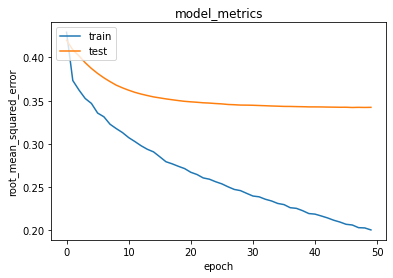

In [73]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Berdasarkan hasil visualisasi metrik evaluasi RMSE terhadap model yang dikembangkan, terlihat hasil model konvergen pada epochs sekitar 50 dan berdasarkan plot metriks model tidak ditemukan adanya indikasi model mengamali overfit atau underfit. Dari proses ini, diperoleh nilai error akhir sebesar 0.2007 dan error pada data validasi sebesar 0.3424. Nilai tersebut menunjukkan hasil yang cukup baik untuk sistem rekomendasi yang dihasilkan. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi preferensi pengguna terhadap item. Hal inilah yang menyebabkan hasil rekomendasi dari model cukup akurat.